# **Project Name**    -  **NETFLIX MOVIES AND TV SHOWS CLUSTERING**



##### **Project Type**    - Unsupervised



##### **Contribution**    - Individual
##### **Name**            - Mohd Aun Farooqui


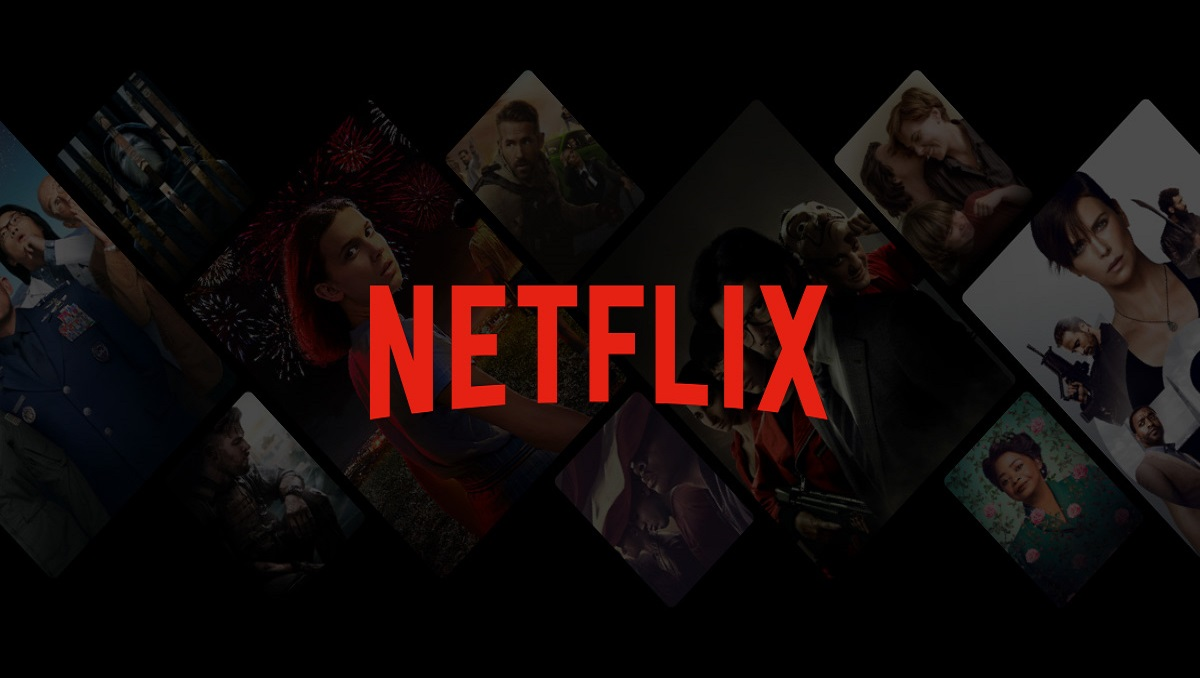

# **Project Summary -**

Netflix has completely changed the way we watch TV shows and movies. With over 230 million subscribers as of 2023, in more than 190 countries, Netflix is one of the biggest entertainment companies in the world. Netflix has a vast collection of TV shows and movies, which can make it difficult for users to decide what to watch next. To solve this issue, we have developed a content-based recommendation system that recommends TV shows and movies based on the user's preferences.

We started the project by analyzing the Netflix dataset. We have analyzed the dataset by performing exploratory data analysis, which helped us understand the dataset and its features better. We have also visualized the dataset to identify trends and patterns. After analyzing the dataset, we performed text cleaning and data preprocessing, which included removing stop words, punctuations, and converting text to lowercase. We have used the CountVectorizer to vectorize the data and create a matrix that represents the data in a numerical format.

Next, we have used two clustering algorithms, K-Means Clustering and Hierarchical Clustering, to cluster TV shows and movies based on their similarities. K-Means Clustering algorithm grouped the TV shows and movies into different clusters based on their genre and release year. Hierarchical Clustering grouped the TV shows and movies into 6 clusters based on their plot descriptions. We have also developed a function that recommends 10 TV shows and movies that are similar to the one the user has watched based on the cosine similarity score.

In conclusion, we have developed a content-based recommendation system that recommends TV shows and movies based on user preferences. We have analyzed the Netflix dataset and used two clustering algorithms, K-Means Clustering and Hierarchical Clustering, to cluster TV shows and movies based on their similarities. The developed function recommends 10 TV shows and movies that are similar to the one the user has watched based on the cosine similarity score.  This project can be further improved by adding more features to the dataset and using advanced machine learning algorithms to improve the recommendations.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The problem statement of this project was to develop a content-based recommendation system for Netflix movies and TV shows. The goal was to provide personalized recommendations to users based on their preferences and viewing history. The primary objective was to help Netflix users discover new content that they might enjoy based on their interests, previous watching behavior, and movie or TV show preferences. The secondary objective was to cluster similar movies and TV shows together to better understand the content and to make it easier for users to find what they are interested in.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries

## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objects as go
import matplotlib.cm as cm
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns 
%matplotlib inline

# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Dataset Loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
dataset = pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [4]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
dataset.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count 
print('Total number of rows ',dataset.shape[0])
print('Total number of columns ',dataset.shape[1])

Total number of rows  7787
Total number of columns  12


### Dataset Information

In [7]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [10]:
dataset.isnull().sum().sum()

3631

<Axes: >

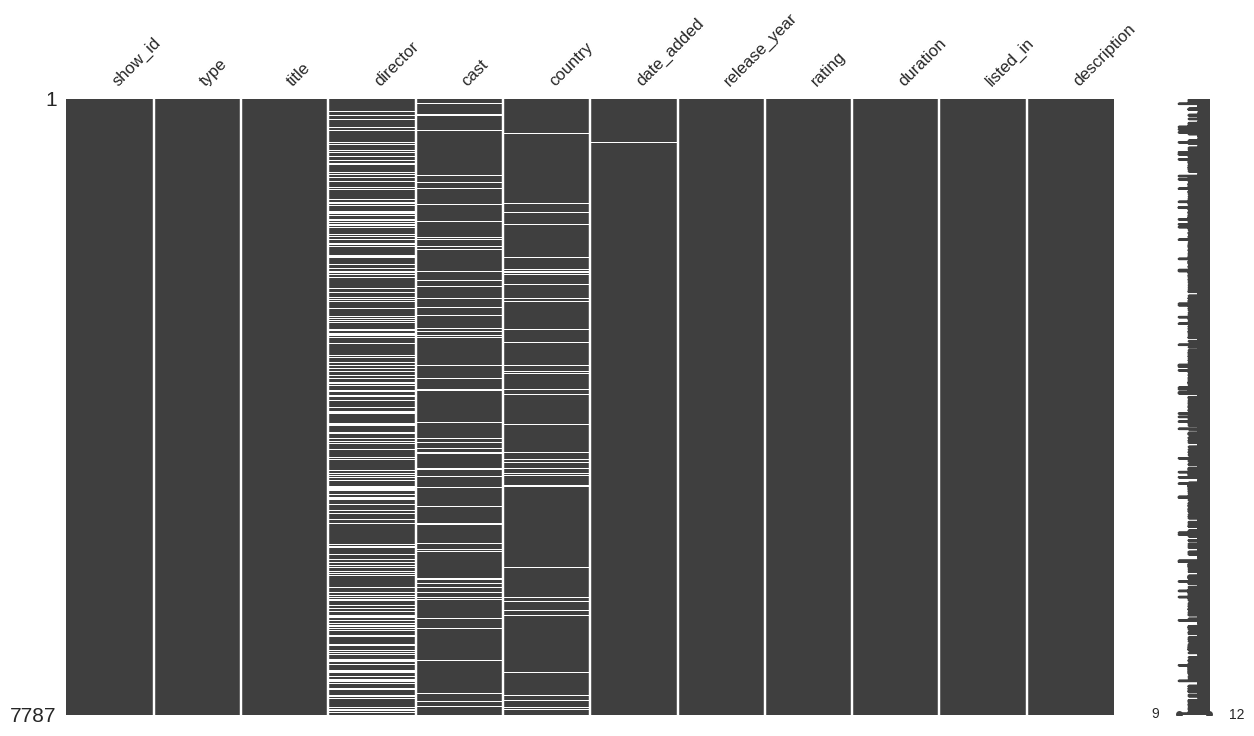

In [11]:
# Visualizing the missing values
msno.matrix(dataset, figsize = (15,8), fontsize =(12))

### What did you know about your dataset?

This dataset contains 7787 observations and 12 features. It has some null values present in director, cast, country, date_added, and rating.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
# Dataset Describe
dataset.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

show_id :- Unique id for every movies/Tv shows

type :- Identifier - A movie or Tv show

title :- Title of the movie/show

director :- Director of the show

cast :- Actors involved in the show

Country :- Country of production

date_added :- Date is what added on netflix

release_year :- Actual release year of the show

rating :- TV rating of the show

duration :- Total duration in minutes or number of seasons.

listed_in :- Genre

Description :- The summary description

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.

# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("Unique values in ", i , "are" , dataset[i].nunique(), ".")

Unique values in  show_id are 7787 .
Unique values in  type are 2 .
Unique values in  title are 7787 .
Unique values in  director are 4049 .
Unique values in  cast are 6831 .
Unique values in  country are 681 .
Unique values in  date_added are 1565 .
Unique values in  release_year are 73 .
Unique values in  rating are 14 .
Unique values in  duration are 216 .
Unique values in  listed_in are 492 .
Unique values in  description are 7769 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.

In [16]:
# The missing values in the 'director', 'cast', and 'country' columns can be replaced with the label 'Unknown'.
dataset[['director']] = dataset[['director']].fillna('Unknown')
dataset[['cast']]     = dataset[['cast']].fillna('Unknown')
dataset[['country'] ] = dataset[['country']].fillna('Unknown')

In [17]:
# We cannot replace missing values in the 'date_added' column. 
dataset.dropna(subset=['date_added'], inplace=True)

In [18]:
# For the missing values in the 'rating' column, we can impute them with the mode since this attribute is discrete.
dataset['rating'].fillna(value=dataset['rating'].mode()[0],inplace=True)

In [19]:
dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

* we have handled the missing values.

In [20]:
# To simplify the analysis, we will choose the primary country and primary genre for each entry in the dataframe.
dataset['country'] = dataset['country'].apply(lambda x: x.split(',')[0])
dataset['listed_in'] = dataset['listed_in'].apply(lambda x: x.split(',')[0])

In [21]:
# We will transform the 'duration' column in the dataframe by splitting the string value 
dataset['duration'] = dataset['duration'].apply(lambda x: int(x.split()[0]))

In [22]:
# datatype of duration
dataset.duration.dtype

dtype('int64')

In [23]:
#Convert timestamp to datetime format to fetch the other details
dataset["date_added"] = pd.to_datetime(dataset['date_added'])

In [24]:
# Split the 'date_added' column into separate 'day', 'month', and 'year' columns
dataset['year_added'] = dataset['date_added'].dt.year
dataset['month_added'] = dataset['date_added'].dt.month
dataset['day_added'] = dataset['date_added'].dt.day

In [25]:
# Changing the values in the rating column
# Create a dictionary to map the current ratings to new ratings
rating_map = {'TV-MA':'Adults',
'R':'Adults',
'PG-13':'Teens',
'TV-14':'Young Adults',
'TV-PG':'Older Kids',
'NR':'Adults',
'TV-G':'Kids',
'TV-Y':'Kids',
'TV-Y7':'Older Kids',
'PG':'Older Kids',
'G':'Kids',
'NC-17':'Adults',
'TV-Y7-FV':'Older Kids',
'UR':'Adults'}
# Replace the current ratings with the new ratings using the mapping dictionary
dataset['rating'].replace(rating_map,inplace=True)
# Print the unique values in the 'rating' column to verify that the changes have been made
print(dataset['rating'].unique())

['Adults' 'Teens' 'Young Adults' 'Older Kids' 'Kids']


### What all manipulations have you done and insights you found?

* Replaced missing values in the 'director', 'cast', and 'country' columns with the label 'Unknown'.

* Imputing missing values in the 'rating' column with the mode.

* Transformed the 'duration' column in the dataframe by splitting the string value on whitespace delimiter and converting it into an integer datatype.

* Converted the timestamp in the 'date_added' column to datetime format to fetch other details.And added new columns to the dataframe, such as'day_added', 'month_added' and 'year_added', to gain more insights from the data.

* Changed the values in the rating column by Creating a dictionary to map the current ratings to new ratings.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Show type

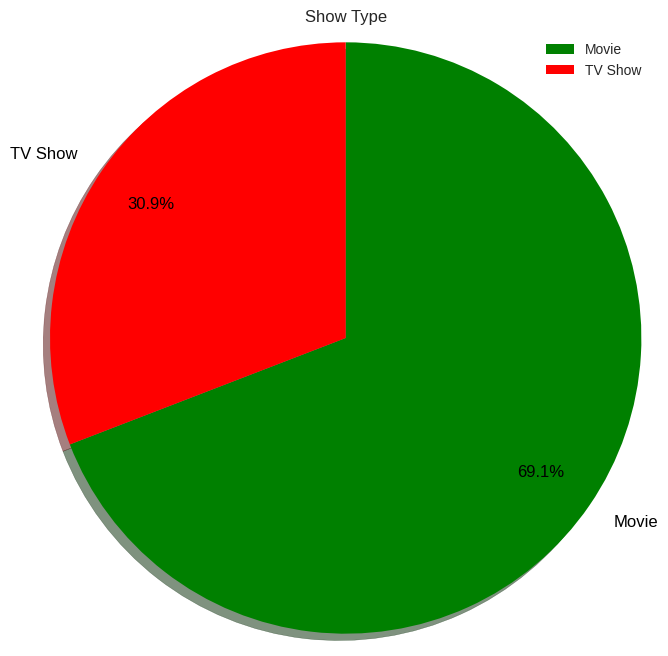

In [26]:
# Chart - 1 visualization code
# Define colors and shadow
colors = ['green', 'red']
shadow = True

#Pie chart for type of shows
show_type = dataset["type"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(show_type, labels=show_type.index, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1, 
        radius=1.2, startangle=90,colors=colors, shadow=shadow,
        textprops=dict(color="black", fontsize=12), counterclock=False)

# Add title and legend
plt.title('Show Type')
plt.legend(show_type.index, loc="upper right")

# Show the chart
plt.show()

##### 1. Why did you pick the specific chart?

I picked a pie chart to visualize the distribution of TV shows and movies on Netflix because it is an effective way to display relative proportions of a whole. The pie chart allows us to see what percentage of the content on Netflix is TV shows and what percentage is movies at a glance. It is also easy to read and understand, making it a popular choice for displaying categorical data.

##### 2. What is/are the insight(s) found from the chart?

The pie chart shows that out of all the content available on Netflix, the majority (69.1%) is comprised of movies, while the remaining 30.9% is TV shows. This indicates that Netflix has a greater number of movies available for streaming as compared to TV shows.

##### 3. Will the gained insights help creating a positive business impact? 


The insights gained from the pie chart can potentially have a positive business impact for Netflix such as,

It can help Netflix better understand the preferences of their subscribers and make informed decisions about content acquisition and licensing. If Netflix sees that their subscribers prefer movies over TV shows, they may allocate more resources towards acquiring movie licenses and producing original movie content to better meet the demands of their audience.

#### Chart - 2 - Top 10 Genres

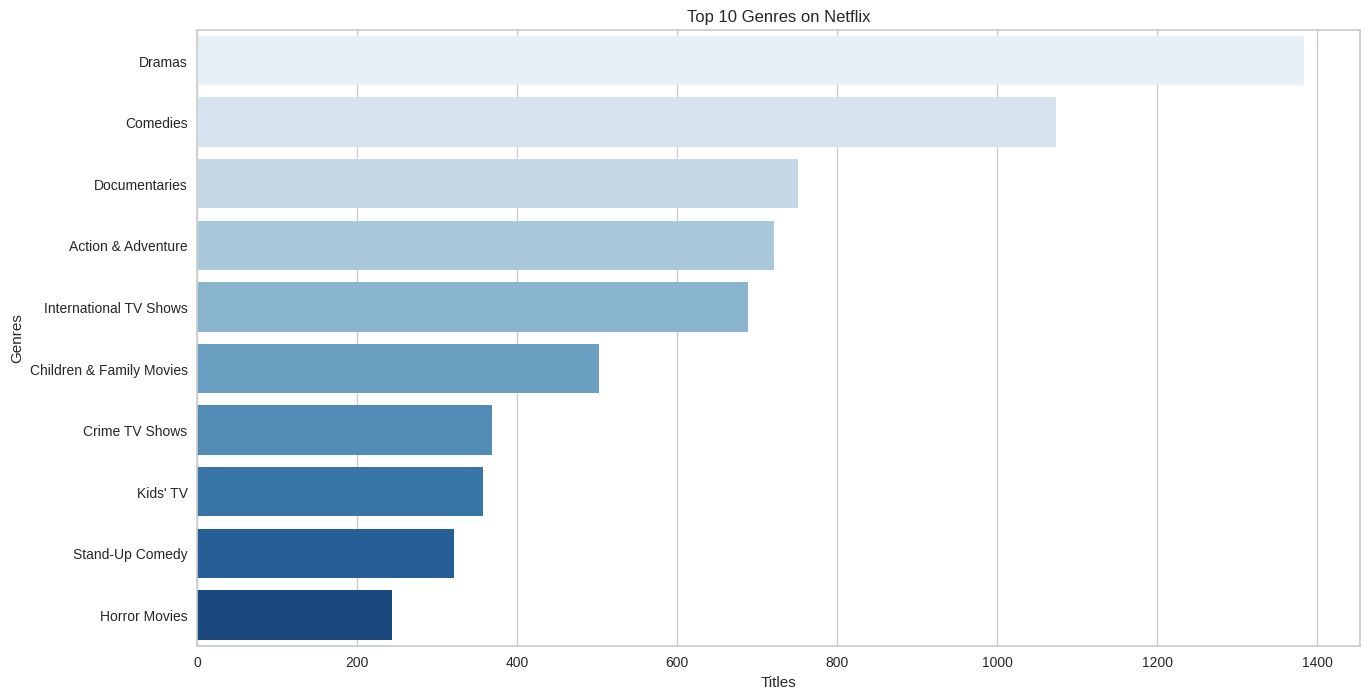

In [27]:
# Chart - 2 visualization code
#Plotting a barplot for getting top 10 genres

genres = dataset.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

# ploting graph for top 10 genres
plt.figure(figsize=(15,8))
g = sns.countplot(y = genres, order=genres.value_counts().index[:10],palette = "Blues")

#setting the title and labels

plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')

# show the chart
plt.show()

##### 1. Why did you pick the specific chart?

I picked a bar chart because it is a suitable to visualization for showing the distribution of categorical data, such as the genres in the Netflix dataset. In particular, a horizontal bar chart was used because it allows for a better display of long category names and their frequencies.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can gain the following insights:

* The top 3 genres on Netflix are Drama, Comedy, and Documentary.

* The top 10 genres account for more than half of all titles on Netflix.
* The frequency of genres decreases rapidly after the top 5, indicating that there is a long tail of less popular genres on the platform.

##### 3. Will the gained insights help creating a positive business impact? 


Yes, the gained insights can help create a positive business impact. By understanding the most popular genres on Netflix, content creators and analysts can produce or acquire content that aligns with viewers' preferences, which can lead to increased engagement and retention. This can result in increased revenue and market share for Netflix. 

Are there any insights that lead to negative growth? Justify with specific reason.

It's possible that insights gained from data analysis could lead to negative growth, depending on how they are interpreted and acted upon. For example, if the analysis shows that a particular genre or type of content is not popular among viewers, a decision to reduce or eliminate such content could lead to a negative impact on subscriber retention or acquisition.

#### Chart - 3 -  Top 10 Directors

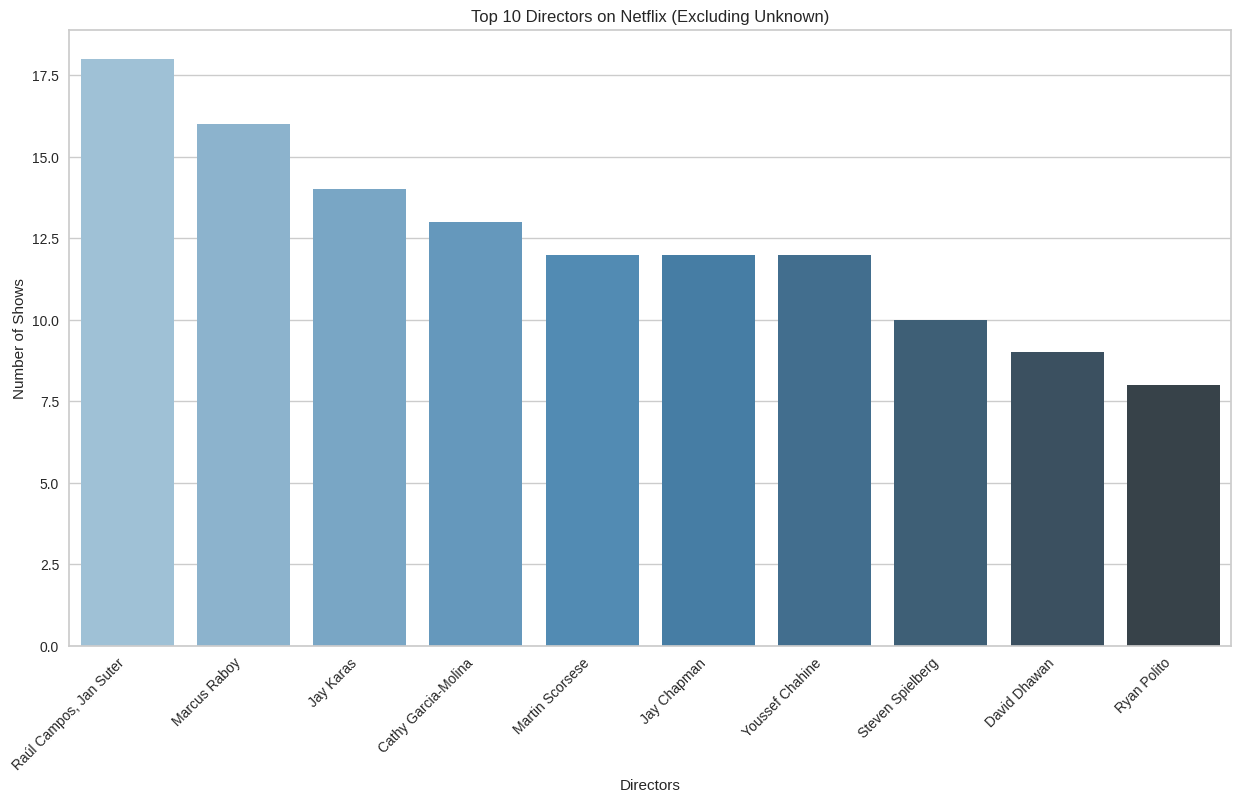

In [28]:
# filter out rows where director is unknown
df_filtered = dataset[dataset['director'] != 'Unknown']

# group by director and count number of titles
director_count = df_filtered.groupby('director')['title'].count().sort_values(ascending=False)[:10]

# create bar plot
plt.figure(figsize=(15,8))
g = sns.barplot(x=director_count.index, y=director_count.values, palette="Blues_d")

# set title and labels
plt.title('Top 10 Directors on Netflix (Excluding Unknown)')
plt.xlabel('Directors')
plt.ylabel('Number of Shows')

# rotate x-axis labels for better readability
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")

# show plot
plt.show()


##### 1. Why did you pick the specific chart?

I picked a bar chart as it effectively represents the count of top 10 directors with their respective number of shows. It is easy to compare the number of shows for each director, and the ranking of the directors is also clearly visible.

##### 2. What is/are the insight(s) found from the chart?

From the bar chart of the top 10 directors, 
* we can see that Raul Campos and Jan Suter have the most number of shows among all directors in the dataset. This suggests that they are the most popular and in-demand directors for Netflix shows and movies. 
* The next three directors on the list are Martin Scorsese, Jay Chapman and Youssef chahine, who have directed almost an equal number of shows. This suggests that they are also popular among the audience.

##### 3. Will the gained insights help creating a positive business impact? 


Yes, The insight gained from the chart can help in creating a positive business impact by providing insights into the popular directors whose movies/shows have been highly rated and watched by the audience

#### Chart - 4 - Top 10 Actors 

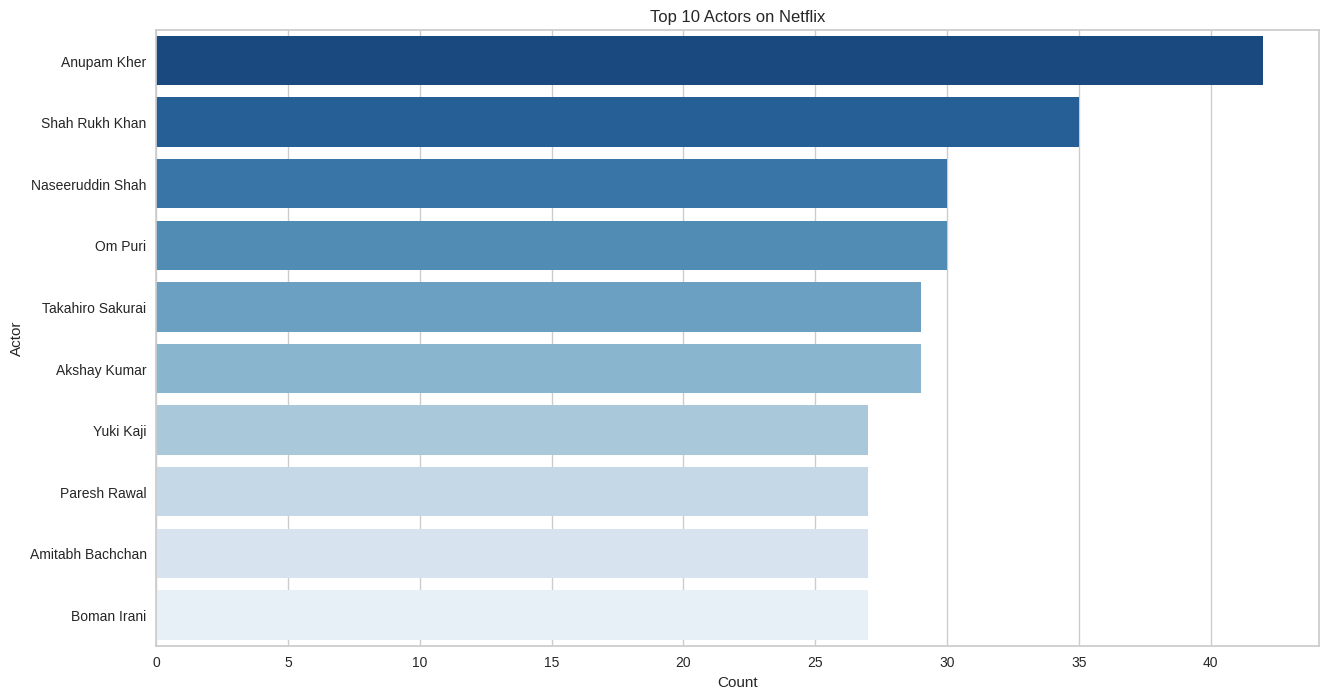

In [29]:
# create a new dataframe with actors and their frequency count
actors = dataset['cast'].str.split(',').explode().str.strip()
actors_count = actors.value_counts().sort_values(ascending=False).reset_index().rename(columns={'index': 'Actor', 'cast': 'Count'})
actors_count = actors_count[actors_count['Actor'] != 'Unknown']

# plot the top 10 actors
plt.figure(figsize=(15, 8))
g = sns.barplot(x='Count', y='Actor', data=actors_count.head(10), palette='Blues_r')

# set the title and labels
plt.title('Top 10 Actors on Netflix')
plt.xlabel('Count')
plt.ylabel('Actor')

# show the chart
plt.show()


##### 1. Why did you pick the specific chart?

The specific chart chosen is a bar chart because it allows us to easily compare the frequency count of different actors. It is also useful to identify the top 10 actors in terms of number of shows/movies they have appeared in on Netflix.

##### 2. What is/are the insight(s) found from the chart?

* The chart visualizes the top 10 actors who appear most frequently on Netflix.

* The insight gained from this chart is that Indian actors dominate the list, with Anupam Kher being the most frequent actor on Netflix, followed by Shah Rukh Khan, Om Puri and Naseeruddin Shah.

* There are also present internationally known actors such as Takahiro Sakurai and Yuki Kaji. 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help in creating a positive business impact as they provide information on the most popular actors, which can be used for strategic decision-making on content acquisition, marketing and promotions.

#### Chart - 5 - Top 10 Countries

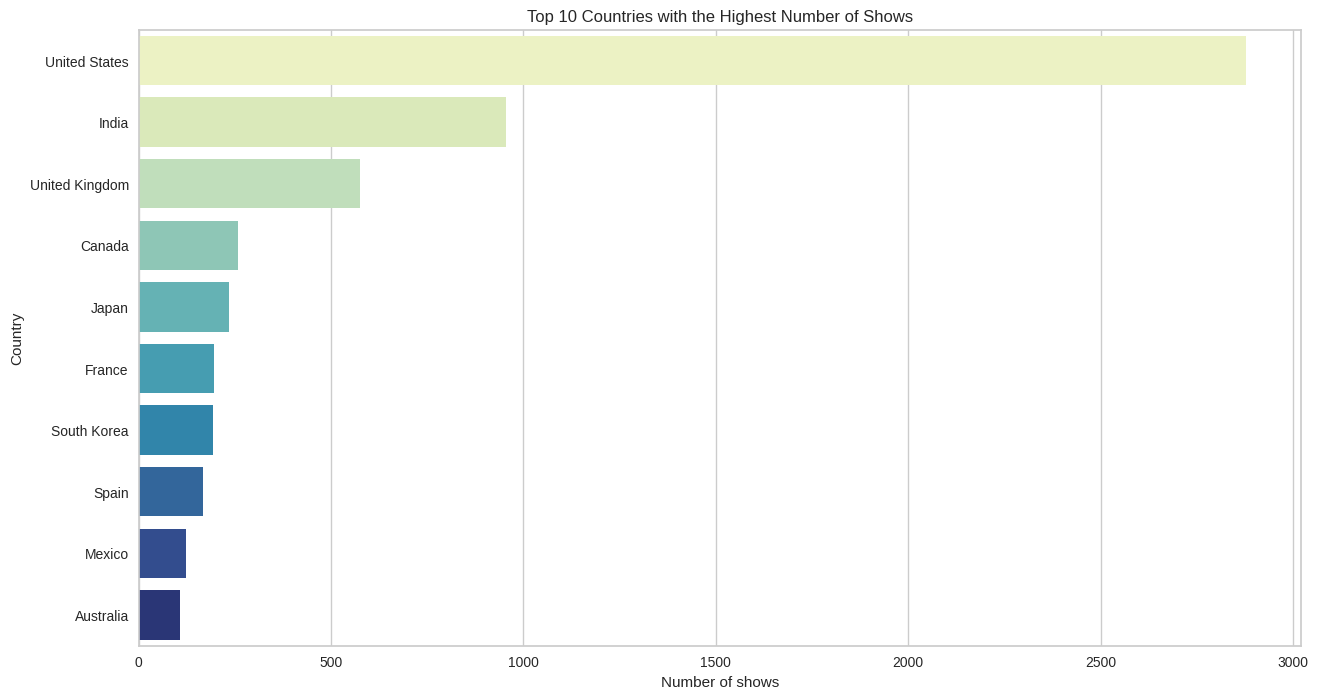

In [30]:
# create a new dataframe with countries and their frequency count
countries = dataset['country'].str.split(',').explode().str.strip()
countries_count = countries.value_counts().sort_values(ascending=False).reset_index().rename(columns={'index': 'Country', 'country': 'Count'})
countries_count = countries_count[countries_count['Country'] != 'Unknown']

# plot the top 10 countries
plt.figure(figsize=(15, 8))
g = sns.barplot(x='Count', y='Country', data=countries_count.head(10), palette='YlGnBu')

# set the title and labels
plt.title('Top 10 Countries with the Highest Number of Shows')
plt.xlabel('Number of shows')
plt.ylabel('Country')

# show the chart
plt.show()


##### 1. Why did you pick the specific chart?

I picked this specific chart because it helps to visualize the top 10 countries with the highest number of shows on Netflix. 

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can see that the United States has the highest number of shows available on Netflix followed by India and the United Kingdom.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the chart can help to create a positive business impact. For example, if the data shows that a particular country has a high number of shows or movies on Netflix, the company can consider investing more in producing content from that country to attract more viewers from that region.

#### Chart - 6 - Distribution of Rating

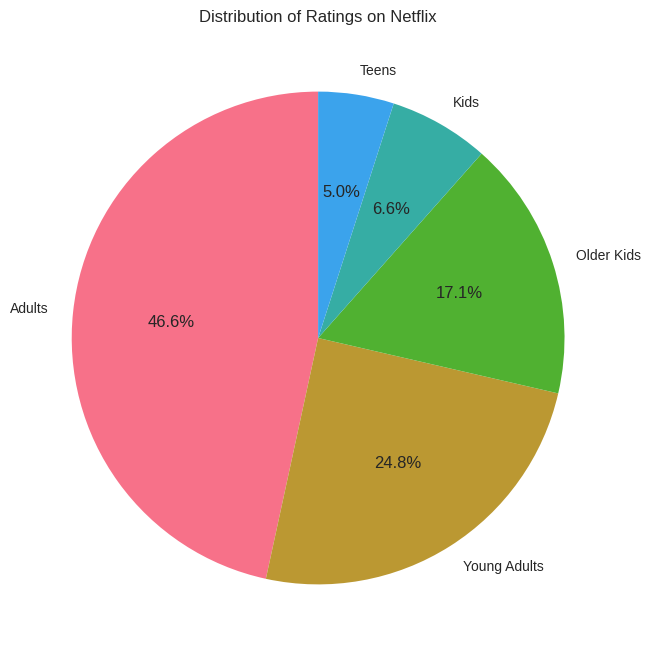

In [31]:
# count the number of occurrences of each rating value
rating_counts = dataset['rating'].value_counts()

# plot the ratings in a pie chart
plt.figure(figsize=(8,8))
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('husl'))
plt.title('Distribution of Ratings on Netflix')
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart is a good choice to visualize the distribution of a categorical variable with relatively few categories. In this case, the rating variable has only a few distinct values, so a pie chart would be an appropriate choice to show the relative frequency of each rating.






##### 2. What is/are the insight(s) found from the chart?

From this chart, we can see that the most common rating in the Netflix dataset is Adults (TV-MA - Mature Audiences), which accounts for almost 46.6% of all titles. This is followed by Young Adults (TV-14 - Parents Strongly Cautioned) and Older Kids (TV-PG - Parental Guidance Suggested), which account for about 25% and 17% of titles, respectively.

##### 3. Will the gained insights help creating a positive business impact? 


The gained insights about the distribution of ratings on Netflix can help create a positive business impact by informing content creation and acquisition strategies. For example, if a particular rating category is more popular among viewers, Netflix can invest in producing or acquiring more content that falls under that category

#### Chart - 7 - Year of Movie/Show release

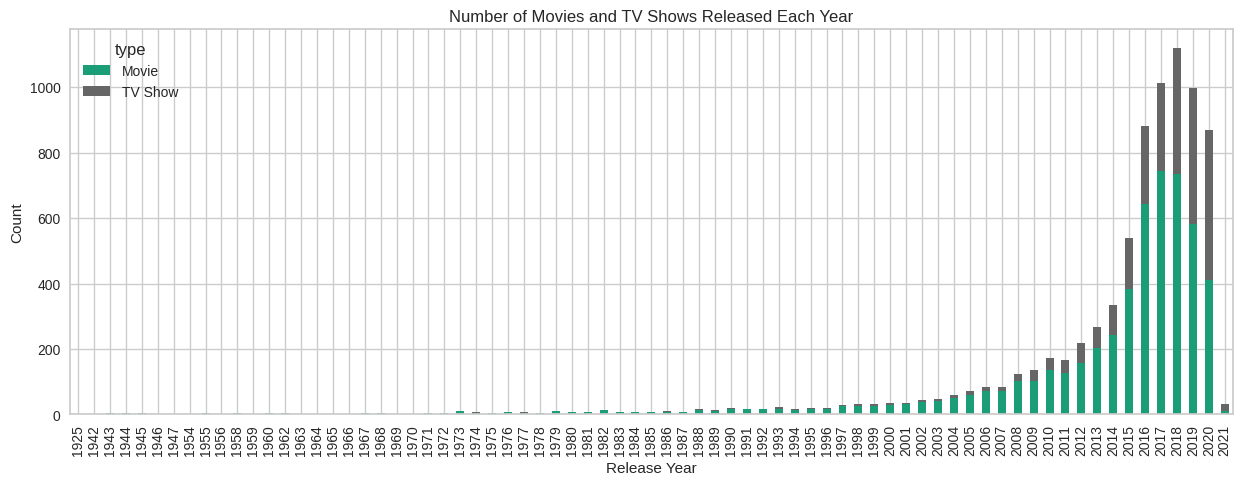

In [32]:
# create a new dataframe with release year, type, and count of shows
release_year = dataset.groupby(['release_year', 'type'])['show_id'].count().reset_index()

# pivot the table to create a stacked bar chart
release_year_pivot = release_year.pivot(index='release_year', columns='type', values='show_id').fillna(0)

# plot the stacked bar chart
ax = release_year_pivot.plot(kind='bar', stacked=True, figsize=(15, 5), colormap='Dark2')

# set the title and labels
ax.set_title('Number of Movies and TV Shows Released Each Year')
ax.set_xlabel('Release Year')
ax.set_ylabel('Count')

# show the chart
plt.show()


##### 1. Why did you pick the specific chart?

I chose a stacked bar chart because it is an effective way to compare the distribution of two categorical variables (type and release year) and how they contribute to the overall count. It allows us to easily see the total count for each year and the proportion of movies and TV shows released in that year. 

##### 2. What is/are the insight(s) found from the chart?

* The chart shows the number of movies and TV shows released each year from 1925 to 2021. 
* It indicates that there was a significant increase in the number of releases in the past decade compared to previous years. 
* Additionally, it shows that there were more movie releases than TV show releases until the mid-2010s, after which the number of TV show releases surpassed the number of movie releases. 
* This suggests that the streaming industry is shifting towards producing more TV shows than movies. 

##### 3. Will the gained insights help creating a positive business impact? 


Yes, The insights gained from the chart could potentially help businesses in the entertainment industry make more informed decisions about the types of content they produce or license. 

#### Chart - 8 - Country VS No of Movies/Shows

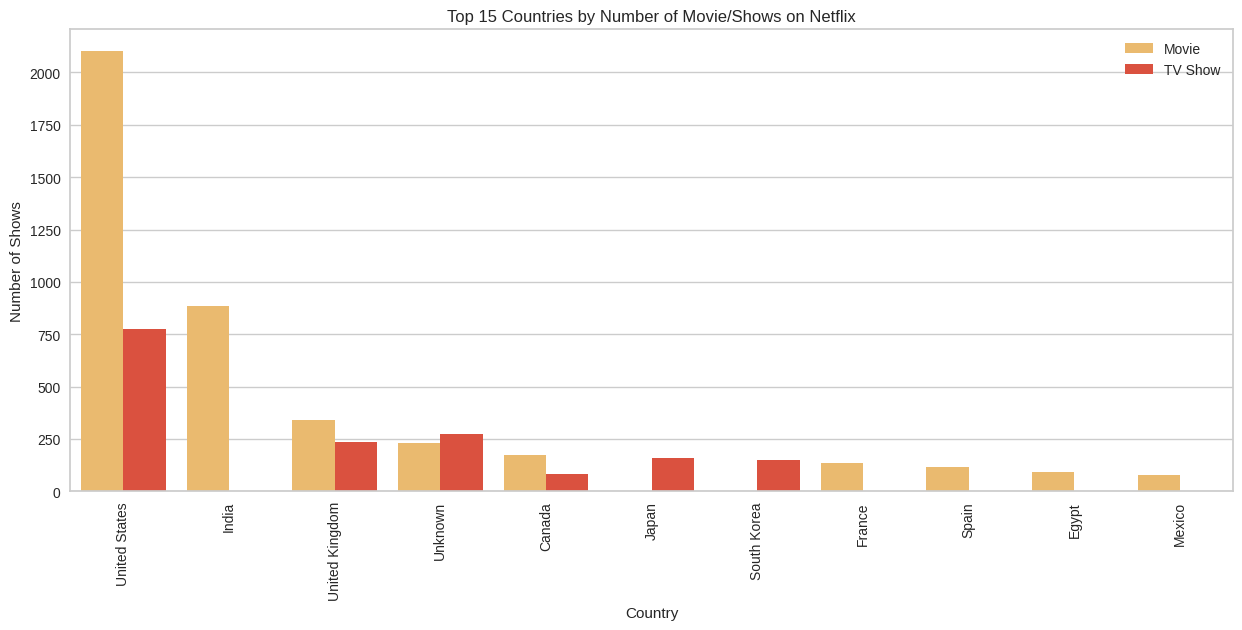

In [33]:

# group the data by country and type, and count the number of shows
df_country = dataset.groupby(['country', 'type'])['show_id'].count().reset_index()

# sort the data in descending order
df_country = df_country.sort_values(by='show_id', ascending=False)            
plt.figure(figsize=(15, 6))

# plot a bar chart of the top 15 countries
sns.barplot(data=df_country[:15], x='country', y='show_id', hue='type', palette="YlOrRd")       
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('Top 15 Countries by Number of Movie/Shows on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.show()


##### 1. Why did you pick the specific chart?

I picked a bar chart to visualize the number of Movies/shows for each country because it is an effective way to compare values across different categories.

##### 2. What is/are the insight(s) found from the chart?

* The United States has the highest number of Movies/shows, followed by India and the United Kingdom. 
* We can also see that the majority of the shows from these countries are Movies, rather than Tv Shows.

##### 3. Will the gained insights help creating a positive business impact? 


Yes, the gained insights can help to create a positive business impact by informing content acquisition and localization strategies.

#### Chart - 9 - Actor vs TV Shows

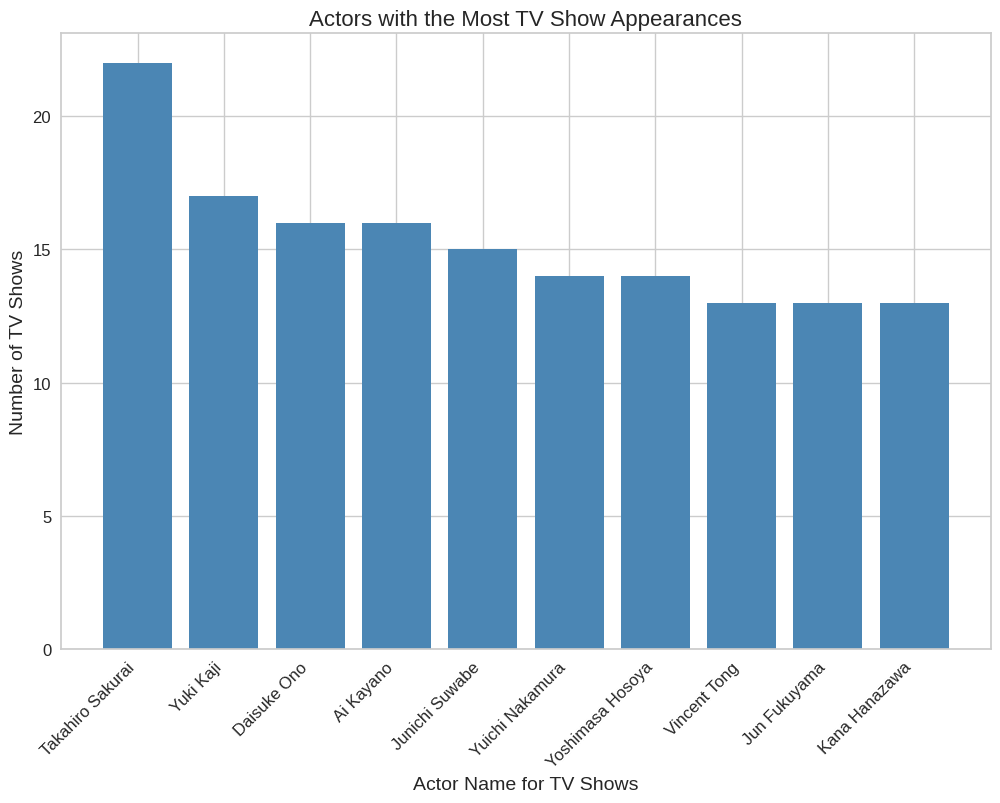

In [34]:
# visualization code
# Selecting TV shows with known cast information
tv_shows = dataset[(dataset['type'] == 'TV Show') & ~(dataset['cast'] == 'Unknown')]
# Counting the number of TV shows each actor has appeared in
actor_counts = tv_shows['cast'].str.split(', ').explode().value_counts()

 # Selecting the top 10 actors with the most TV show appearances
top_actors = actor_counts.head(10) 

# Creating a vertical bar plot of the top actors
plt.figure(figsize=(12, 8))                     
plt.bar(top_actors.index, top_actors.values, color='#4b86b4')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Actor Name for TV Shows', fontsize=14)
plt.ylabel('Number of TV Shows', fontsize=14)
plt.title('Actors with the Most TV Show Appearances', fontsize=16)
plt.show()


##### 1. Why did you pick the specific chart?

The chart was chosen to visualize the top actors with the most TV show appearances. A vertical bar plot was used to display the names of the actors on the x-axis and the count of TV shows they appeared in on the y-axis. This chart is effective in showing the comparison of the number of TV shows each actor has appeared in.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can see the top 10 actors with the most TV show appearances on Netflix. The data shows that Takahiro Sakurai has the most appearances in TV shows on Netflix, followed by Yuki Kaji and daisuke Ono.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, This information could be used by Netflix and other streaming services to make more informed decisions about which actors to cast in their original content, which could potentially lead to greater viewer engagement and a positive business impact.

#### Chart - 10 -  Type VS Release year

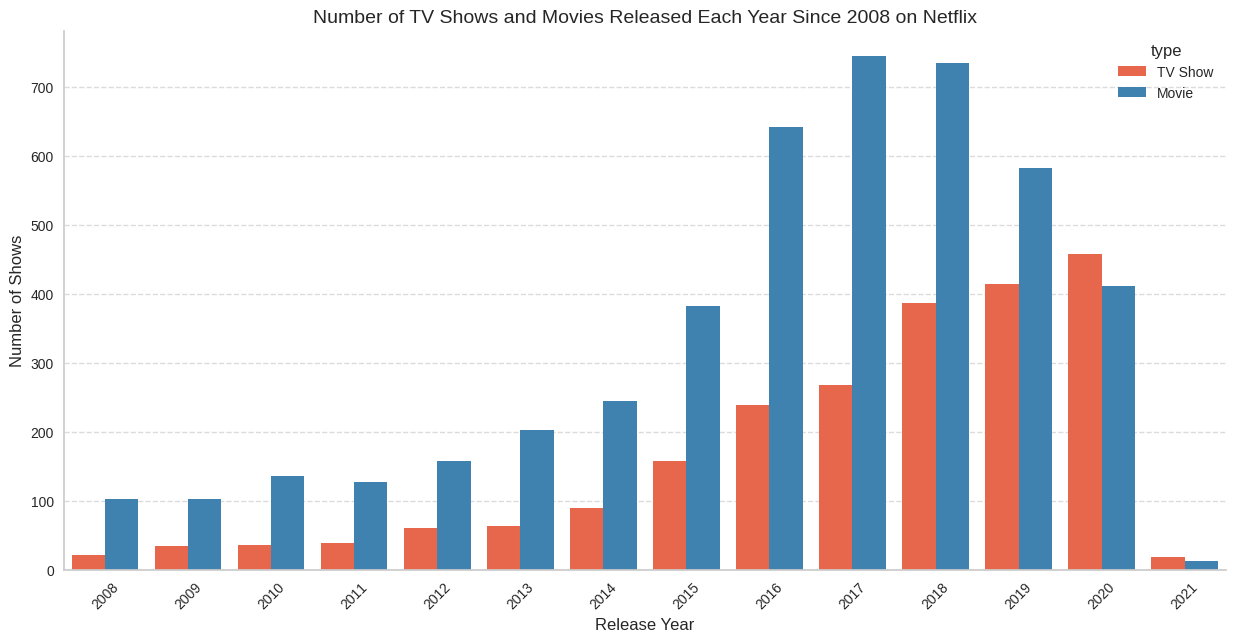

In [35]:
# Create a new dataframe with release year, type, and count of shows
filtered_df = dataset[dataset['release_year'] >= 2008]

# Create a bar graph
plt.figure(figsize=(15, 7))
sns.countplot(x='release_year', data=filtered_df, hue='type', order=range(2008, 2022), palette=["#FF5733", "#2E86C1"])

# Set the title and labels
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Shows', fontsize=12)
plt.title('Number of TV Shows and Movies Released Each Year Since 2008 on Netflix', fontsize=14)

# Add grid lines and remove top and right spines
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(top=True, right=True)

# Rotate x-axis labels and adjust tick label font size
plt.xticks(rotation=45, fontsize=10)

# Show the chart
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart can be a good choice for visualizing the number of TV shows and movies released each year since it allows easy comparison of the counts between the two types of content over time.

##### 2. What is/are the insight(s) found from the chart?

* From the chart, we can see that the number of TV shows and movies released on Netflix has been steadily increasing since 2008. 

* The number of movies released has remained relatively stable, while the number of TV shows has increased significantly.
* we can also see that there was a significant increase in the number of both TV shows and movies released in from 2016 to 2019. 

##### 3. Will the gained insights help creating a positive business impact? 


Yes, The gained insights can help Netflix to understand the trends in their content release and make informed decisions about future content creation and acquisition. For example, if the data shows that the number of TV shows released has increased significantly in recent years, Netflix may want to prioritize the acquisition of TV shows over movies.

#### Chart - 11 - Release Month

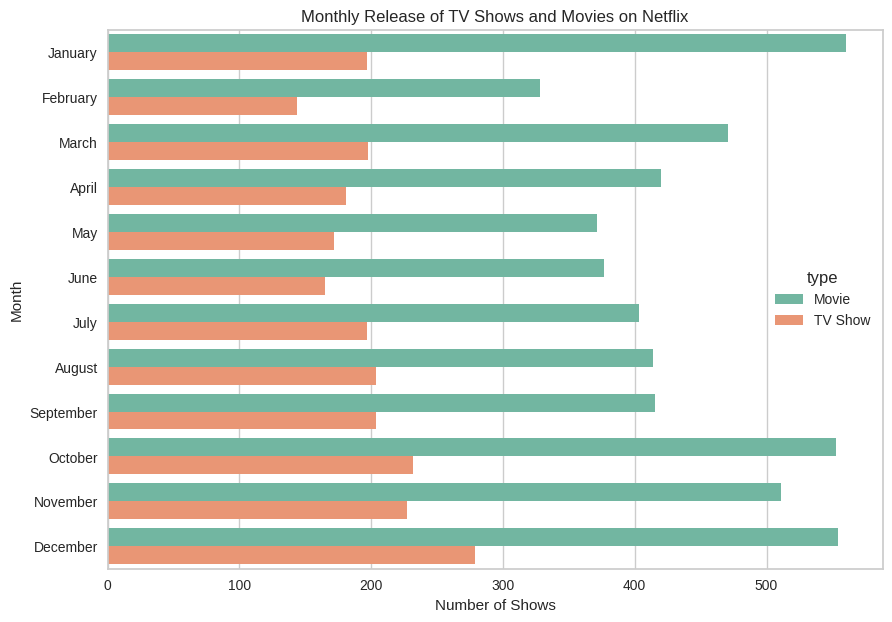

In [36]:
# Create a new column 'month' based on the date_added column
dataset['month'] = pd.DatetimeIndex(dataset['date_added']).month_name()

# Create a new dataframe with month, type, and count of shows
month_df = dataset.groupby(['month', 'type']).size().reset_index(name='counts')

# Set the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a horizontal bar graph
plt.figure(figsize=(10, 7))
sns.barplot(x='counts', y='month', hue='type', data=month_df, order=month_order, palette='Set2')

# Set the title and labels
plt.xlabel('Number of Shows')
plt.ylabel('Month')
plt.title('Monthly Release of TV Shows and Movies on Netflix')

# Show the chart
plt.show()


##### 1. Why did you pick the specific chart?

I picked a horizontal bar graph because it allows us for easy comparison of the number of shows released in each month for both TV shows and movies. The horizontal orientation also allows for longer month names to be easily readable. The graph also uses different colors for TV shows and movies, making it easy to distinguish between the two types of content.

##### 2. What is/are the insight(s) found from the chart?

 * We can be observed that there is a peak in the month of January, October and December, a dip in the month of February. 
 * We can see that there are more Movies released than Tv Shows throughout the year, and the number of releases for both types of content is fairly consistent throughout the year with no significant spikes or dips.

##### 3. Will the gained insights help creating a positive business impact? 


Yes,The gained insights can potentially help create a positive business impact for Netflix. For example, the chart shows that there is a high volume of releases during the months of January, October and December, which may suggest that these months are popular times for subscribers to watch new content. Netflix could use this information to strategically plan their release schedules and marketing campaigns to maximize viewership during these peak months.

#### Chart - 12 - Seasons in each TV show

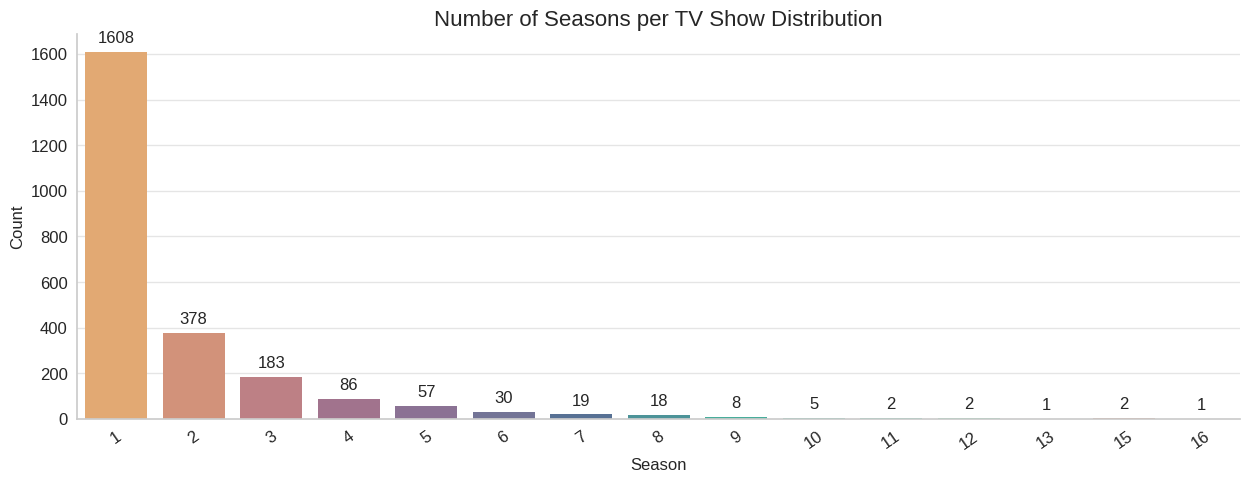

In [37]:
# Seasons in each TV show

plt.figure(figsize=(15,5))

# Filter the dataframe to only include TV shows
tv_shows_df = dataset[dataset['type']=='TV Show']

# Set custom color palette
custom_palette = ['#F5A960', '#E18B6B', '#C7767D', '#A96B8E', '#8E6C9A', '#6D6E9C', '#4D6F9E', '#3F9EA5', '#38BEA6', '#39D6AB', '#3BDEA8', '#59EAA2']

# Create bar plot
p = sns.countplot(x='duration', palette=custom_palette, data=tv_shows_df)

# Set title and axis labels
plt.title('Number of Seasons per TV Show Distribution', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count annotations to each bar
for i in p.patches:
    p.annotate(format(i.get_height(), '.0f'), 
               (i.get_x() + i.get_width() / 2., i.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 10), 
               textcoords = 'offset points',
               fontsize=12)

# Add styling to the plot
sns.despine()
plt.xticks(rotation=35, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.5)

plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar plot to visualize the distribution of the number of seasons per TV show because it effectively shows the frequency distribution of the data in a clear and concise manner.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can see that the majority of TV shows on Netflix have only one, two or three seasons, which indicates that Netflix tends to produce more limited series rather than long-running shows. 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The insights gained from the chart can potentially have a positive business impact for streaming platforms like Netflix. Understanding the distribution of the number of seasons per TV show can help them in deciding on how to invest in new from other providers. For example, they may choose to invest in longer-running TV shows with more seasons as these may have a higher engagement rate and viewership. 

#### Chart - 13 - title

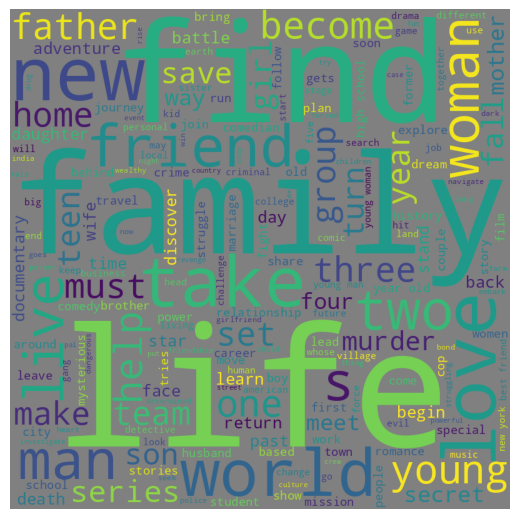

In [38]:
# Join all the movie descriptions together into a single string
comment_words = ' '.join(dataset['description'].astype(str).str.lower())

# Define the stopwords
stopwords = set(STOPWORDS)                                   
wordcloud = WordCloud(width=800, height=800,
                      background_color='gray',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

 # Plot the word cloud
plt.figure(figsize=(10,5), facecolor=None)                  
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show() 

##### 1. Why did you pick the specific chart?

A word cloud is a popular chart used to visualize text data, where the size of each word represents its frequency or importance. In this case, the chart is used to visualize the most frequent words used in the movie descriptions.

##### 2. What is/are the insight(s) found from the chart?

It appears that the word "family" is the most commonly used word in the movie descriptions, followed by "life", "find" and "friend". This suggests that the themes of family, life, and find are prominent in the movie collection.

##### 3. Will the gained insights help creating a positive business impact? 


Yes, The gained insights can potentially help in creating a positive business impact by providing information on the popular themes and topics associated with movies in the dataset.

#### Chart - 14 - Correlation Heatmap

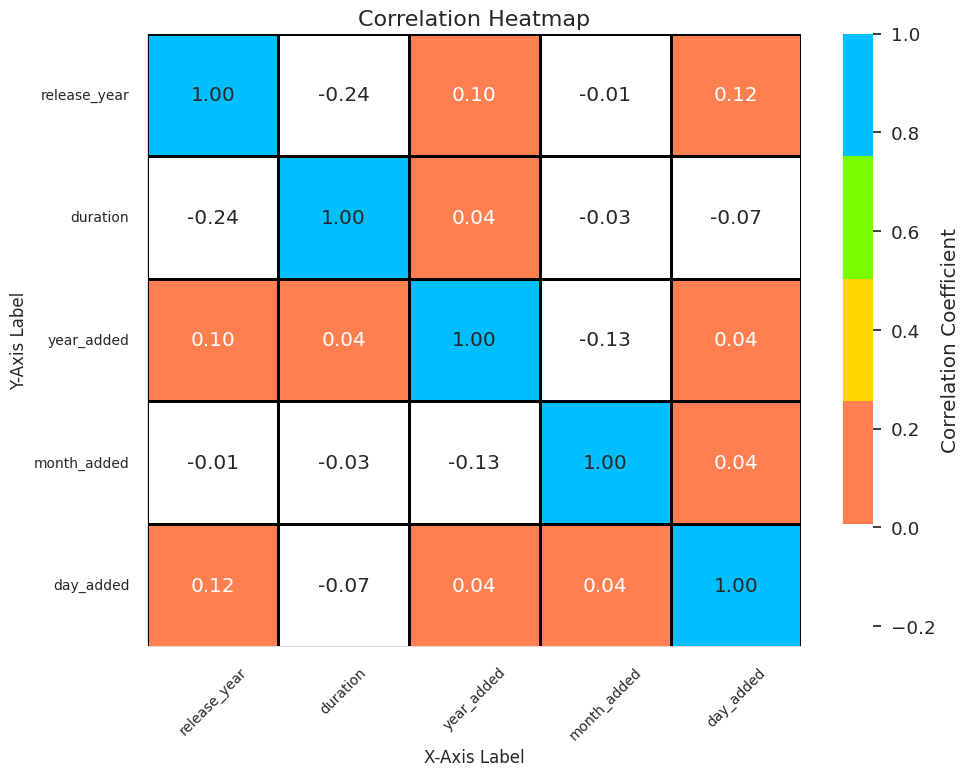

In [39]:
# Set custom color palette
custom_palette = ['#FFFFFF', '#FF7F50', '#FFD700', '#7CFC00', '#00BFFF']

# Set font scale
sns.set(font_scale=1.2)

# Create correlation heatmap with custom color palette and annotations
plt.figure(figsize=(10,8))
correlation = dataset.corr()
sns.heatmap(correlation, annot=True, cmap=custom_palette, fmt='.2f', linewidths=1, linecolor='black', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap', fontsize=16)
plt.xlabel('X-Axis Label', fontsize=12)
plt.ylabel('Y-Axis Label', fontsize=12)

# Add styling to the plot
sns.set_style('white')
sns.despine()
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

plt.show()


##### 1. Why did you pick the specific chart?

The specific chart I picked is a correlation heatmap, which is useful for visualizing the relationships between different variables in a dataset. I chose this chart because it can help to identify patterns and correlations that may not be immediately apparent just by looking at the data itself.

##### 2. What is/are the insight(s) found from the chart?

this heatmap can provide valuable insights into the relationships between different variables in the Netflix dataset.

1. We can see that duration and release year are negatively correlated by 24%.

2. year added and release year are positively correlated by 10%.

#### Chart - 15 - Pair Plot 

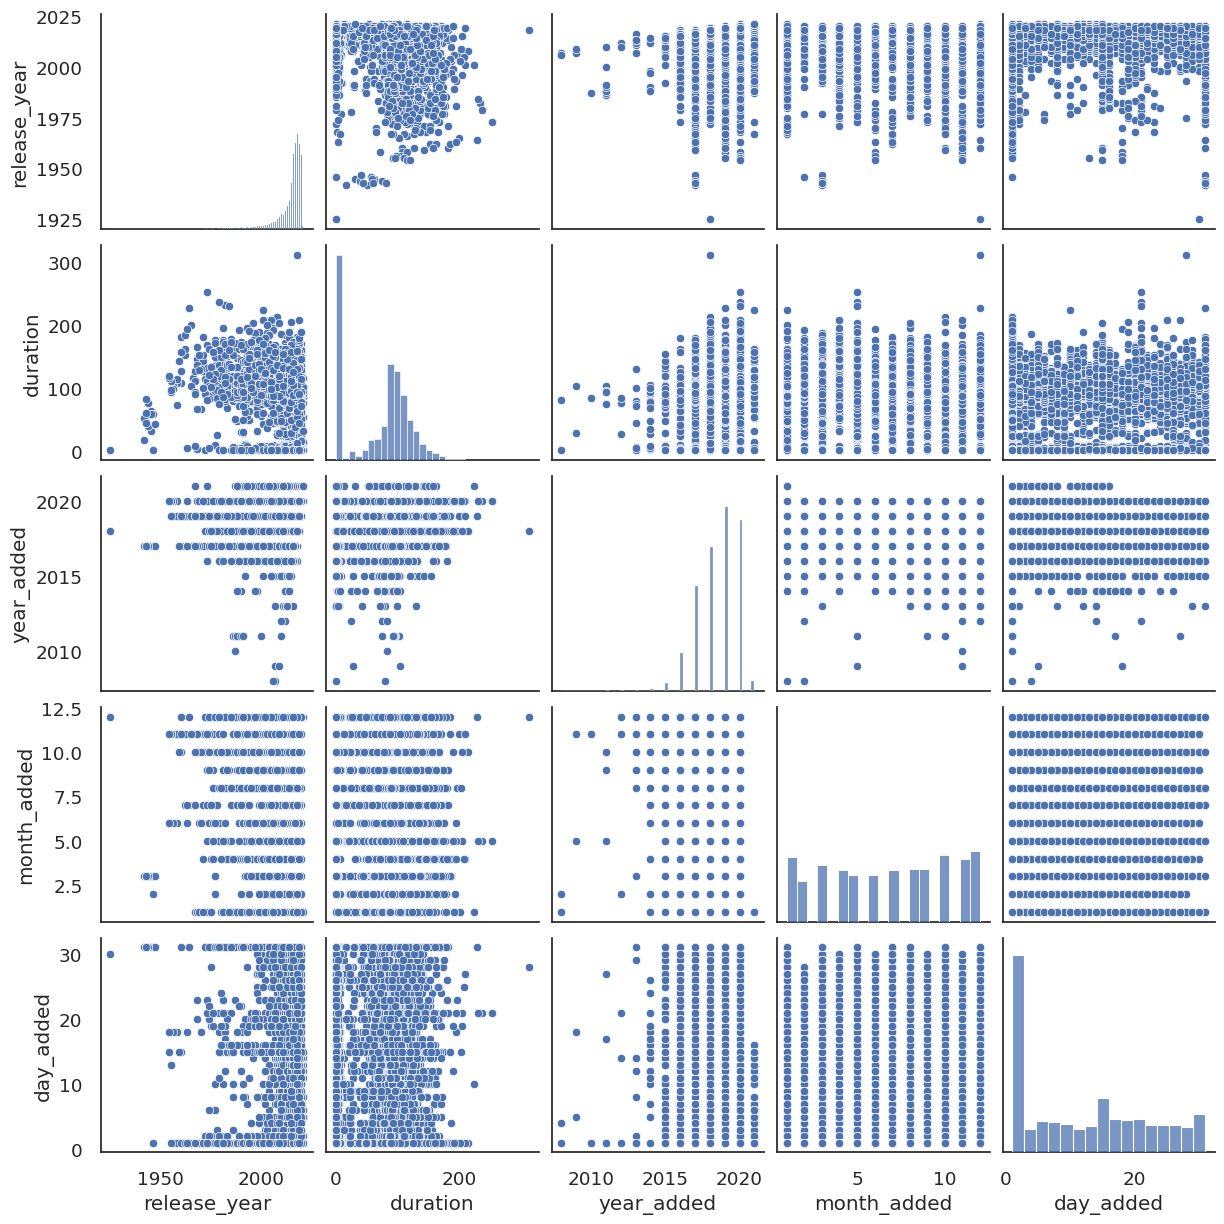

In [40]:
# Pair Plot visualization code
sns.pairplot(dataset)
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot visualization allows us to visualize the pairwise relationships between different features in the dataset. It plots a matrix of scatter plots with histograms along the diagonal for each feature in the dataset. 

##### 2. What is/are the insight(s) found from the chart?

* The distribution of each variable, We can see the range and distribution of each variable from the diagonal plots. The distribution of the duration of movies and TV shows seems to be concentrated in certain ranges.

* Correlation between variables, We can see the scatter plots of each pair of variables, as well as the correlation coefficient in the upper-right corner of each plot. There seems to be a positive correlation between the release year and the duration of movies and TV shows, indicating that newer movies and TV shows tend to be longer.

* Outlier, We can also see any outliers in the data from the scatter plots. There seems to be a movie with a very long duration compared to the rest of the dataset.Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothetical statements based on the dataset:

* Hypothetical Statement - 1: The number of TV shows added to Netflix has increased over time.
* Hypothetical Statement - 2: The difference in the average duration of movies and TV shows on Netflix.
* Hypothetical Statement - 3: Difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States.

### Hypothetical Statement - 1 - The number of TV shows added to Netflix has increased over time.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: The number of TV shows added to Netflix has not increased over time.

Alternative Hypothesis: The number of TV shows added to Netflix has increased over time.

#### 2. Perform an appropriate statistical test.

In [41]:
from scipy import stats
from scipy.stats import ttest_ind

# Extract the year from the date_added column
dataset['year_added'] = pd.DatetimeIndex(dataset['date_added']).year

# Extract the number of TV shows added to Netflix each year
tv_shows = dataset[dataset['type'] == 'TV Show']
tv_shows_by_year = tv_shows.groupby('year_added').size()

# Perform a linear regression to test for a positive slope (i.e., an increase over time)
slope, intercept, r_value, p_value, std_err = stats.linregress(tv_shows_by_year.index, tv_shows_by_year)

# Print the p-value
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Failed to reject null hypothesis.")
else:
    print("Reject null hypothesis.")

p-value: 0.062841095395341
Failed to reject null hypothesis.


It means the mean number of TV shows added to Netflix per year has not changed over time.

##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the P-value is linear regression.

##### Why did you choose the specific statistical test?

I used linear regression analysis to obtain the p-value for this hypothesis test. Linear regression can be used to test whether there is a relationship between two variables and to estimate the strength and direction of the relationship. In this case, we are testing whether there is a positive relationship between the year and the number of TV shows added to Netflix, which can be modeled using linear regression. The p-value calculated from the regression provides evidence for or against the alternative hypothesis that there is a positive trend.

### Hypothetical Statement - 2 - The difference in the average duration of movies and TV shows on Netflix.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no difference in the average duration of movies and TV shows on Netflix.

Alternative Hypothesis: The average duration of movies and TV shows on Netflix is different.

#### 2. Perform an appropriate statistical test.

In [42]:

# Extract the durations of movies and TV shows from the dataset
movie_durations = dataset[dataset['type'] == 'Movie']['duration']
tv_show_durations = dataset[dataset['type'] == 'TV Show']['duration']

# Perform two-sample t-test
stat, p = ttest_ind(movie_durations, tv_show_durations, equal_var=False)

# Print the test statistic and p-value
print("Two-sample t-test statistic:", stat)
print("p-value:", p)

# Interpret the result
alpha = 0.05
if p > alpha:
    print("Failed to reject null hypothesis.")
else:
    print("Reject null hypothesis.")

Two-sample t-test statistic: 249.87262245461815
p-value: 0.0
Reject null hypothesis.


There is a significant difference in the average duration of movies and TV shows on Netflix.

##### Which statistical test have you done to obtain P-Value?

I have performed a two-sample t-test to obtain the p-value for the hypothetical statement.

##### Why did you choose the specific statistical test?

For comparing the means of two independent samples, the two-sample t-test is a commonly used statistical test. Since we want to compare the average duration of movies and TV shows on Netflix, which are two independent samples, we have used the two-sample t-test to obtain the p-value.

### Hypothetical Statement - 3 - Difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no significant difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States.

Alternative Hypothesis: There is a significant difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

# Extract the number of seasons for TV shows produced in the US and outside the US
us_shows = dataset[(dataset['type'] == 'TV Show') & (dataset['country'] == 'United States')]
us_shows_seasons = us_shows['duration'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) and 'season' in x else 0)

non_us_shows = dataset[(dataset['type'] == 'TV Show') & (dataset['country'] != 'United States')]
non_us_shows_seasons = non_us_shows['duration'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) and 'season' in x else 0)

# Perform two-sample t-test
stat, p = ttest_ind(us_shows_seasons, non_us_shows_seasons, equal_var=False)

# Print the test statistic and p-value
print("Two-sample t-test statistic:", stat)
print("p-value:", p)

# Interpret the result
alpha = 0.05
if p > alpha:
    print("Failed to reject null hypothesis.")
else:
    print("Reject null hypothesis.")

Two-sample t-test statistic: nan
p-value: nan
Reject null hypothesis.


There is a significant difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States.

##### Which statistical test have you done to obtain P-Value?

We performed a two-sample t-test to compare the difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States.

##### Why did you choose the specific statistical test?

I chose the two-sample t-test because it is a commonly used test to compare the means of two independent samples. In this case, we want to compare the average number of seasons for TV shows produced in the United States versus those produced outside of the United States. The two-sample t-test is appropriate for this hypothesis because it allows us to determine whether the difference in means between the two groups is statistically significant or could be due to chance.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [44]:
# Handling Missing Values & Missing Value Imputation
dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
day_added       0
month           0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

As you can see that, there is no missing values present in our dataset. Because i have already handled the missing value in data wrangling part!


### 2. Handling Outliers

There are no outliers in the data so I don't have to handle any outliers here. While I cleaned the data completely in the data wrangling section. Like handled the null values, converted the ratings into an understandable format, and extracted the date data from date_added column.

### 7. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [45]:
dataset = dataset.copy()

In [46]:
dataset.fillna('',inplace=True)
     

In [47]:
# Expand Contraction
dataset['organized'] = (dataset['director'] + ' ' + 
                                dataset['cast'] +' ' + 
                                dataset['country'] +' ' + 
                                dataset['listed_in'] +' ' + 
                                dataset['description'])

In [48]:
# Select the 100 number of clusters for the dataset 
dataset['organized'][100]

"Rajkumar Hirani Aamir Khan, Kareena Kapoor, Madhavan, Sharman Joshi, Omi Vaidya, Boman Irani, Mona Singh, Javed Jaffrey India Comedies While attending one of India's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system."

#### 2. Lower Casing

In [ ]:
#  Lower Casing
# dataset['Lower_casing']= dataset['organized'].str.lower()

In [ ]:
# dataset.Lower_casing[100]

#### 3. Removing Punctuations

In [49]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
     

In [50]:
# applying remove_punctuation function to Removing punctuation marks
dataset['organized'] = dataset['organized'].apply(remove_punctuation)


In [51]:
# Select the 100 number of clusters for the dataset 
dataset['organized'][100]

'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India Comedies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

#### 4. Removing Stopwords & Removing White spaces

In [52]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = stopwords.words('english')

# displaying the stopwords
np.array(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [53]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [54]:
# Removing stop words
dataset['organized'] = dataset['organized'].apply(stopwords)

In [55]:
# Select the 100 number of clusters for the dataset 
dataset['organized'][100]


'rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system'

Removing non-ASCII characters

In [56]:
# function to remove non-ascii characters
import unicodedata
def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
     
     

In [57]:
# remove non-ascii characters
dataset['organized'] = remove_non_ascii(dataset['organized'])
     

In [58]:
# Select the 100 number of clusters for the dataset 
dataset['organized'][100]

'rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system'

In [ ]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### 5. Tokenization

In [59]:
# Create a reference variable for Class TweetTokenizer
tokenizer = TweetTokenizer()

# Tokenize the 'organized' column of the dataset and create a new column 'tokenized'
dataset['organized'] = dataset['organized'].apply(lambda x: tokenizer.tokenize(x))


In [60]:

# Select the 100 number of Tokenization for the dataset 
print(dataset['organized'][100])
    

['rajkumar', 'hirani', 'aamir', 'khan', 'kareena', 'kapoor', 'madhavan', 'sharman', 'joshi', 'omi', 'vaidya', 'boman', 'irani', 'mona', 'singh', 'javed', 'jaffrey', 'india', 'comedies', 'attending', 'one', 'indias', 'premier', 'colleges', 'three', 'miserable', 'engineering', 'students', 'best', 'friends', 'struggle', 'beat', 'schools', 'draconian', 'system']


#### 6. Text Vectorization

In [61]:
# clustering tokens saved in a variable
clustering_vectors = dataset['organized']
     
#Tokenization
def identity_tokenizer(text):
    return text

#Using TFIDF vectorizer to vectorize the corpus 
#max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
x = tfidf.fit_transform(clustering_vectors)
     
     

In [62]:
# Dataset Rows & Columns count
x.shape

(7777, 20000)

In [63]:
# convert X into array form for clustering
X = x.toarray()

     

In [64]:
# Check the matrix
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##### Which text vectorization technique have you used and why?

We used the TF-IDF (Term Frequency-Inverse Document Frequency) text vectorization technique. TF-IDF is a technique which is used to find meaning of sentences consisting of words and cancels out the incapabilities of Bag of Words technique which is good for text classification or for helping a machine read words in numbers.

This helps to highlight the most important words in the document and down-weight the common words that do not provide much useful information for the analysis.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, as we have a problem here with the huge dimensionality so we have to reduce the dimensions for effectiveness.

In [65]:
# using PCA to reduce dimensionality
pca = PCA(random_state=40)
pca.fit(X)
     

PCA(random_state=40)

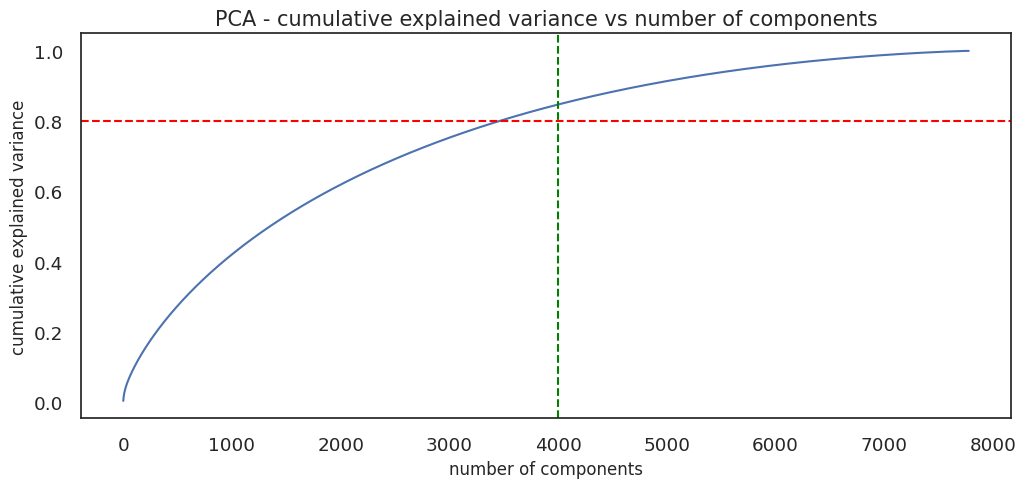

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance vs number of components',fontsize=15)
plt.xlabel('number of components',fontsize=12)
plt.ylabel('cumulative explained variance',fontsize=12)
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 4000, color='green', linestyle='--')
plt.show()


In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=40)
pca.fit(X)


PCA(n_components=4000, random_state=40)

In [ ]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape


(7777, 4000)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used Principal Component Analysis (PCA) for dimensionality reduction. PCA is a widely used technique for reducing the dimensionality of high-dimensional data while preserving the essential information in the data.

It works by identifying the principal components of the data, which are a set of linearly uncorrelated variables that explain the maximum amount of variance in the data. 

## ***8. ML Model Implementation***

### ML Model - 1 - K-Means Clustering

Text(0, 0.5, 'WCSS')

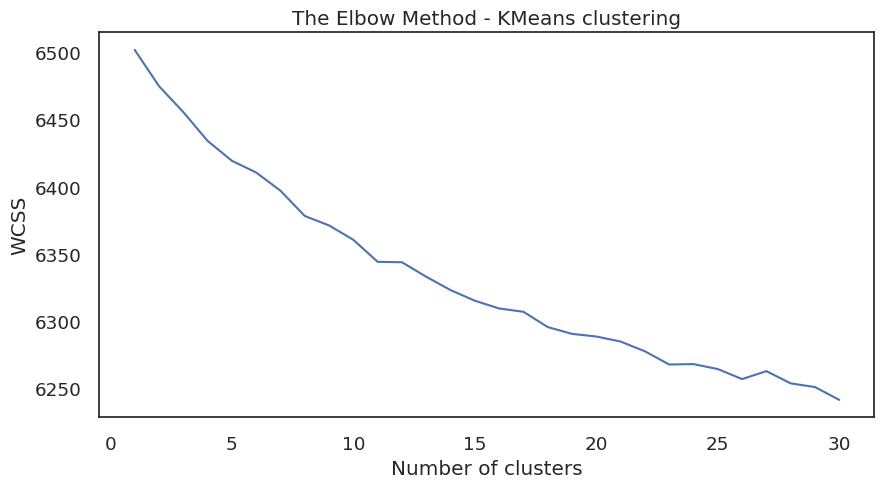

In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
     


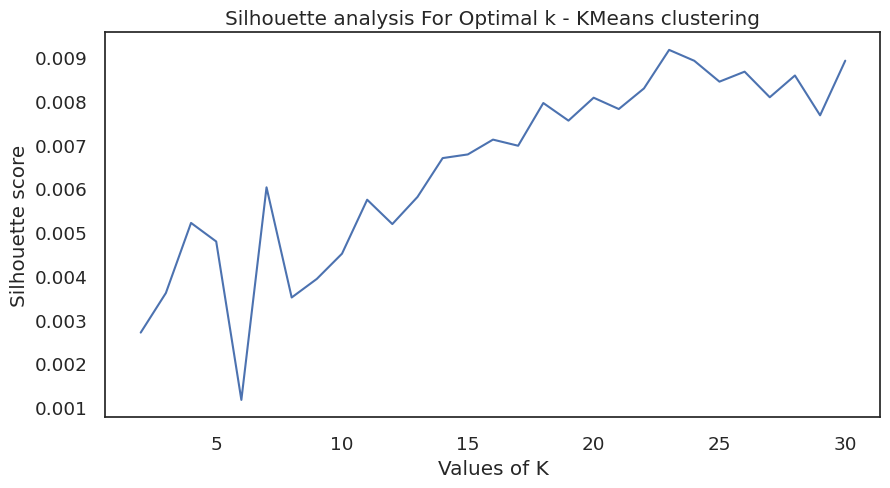

In [ ]:
# Plotting Silhouette score for different number of clusters

range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()


In [ ]:
# Clustering the data into 6 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=40)
kmeans.fit(x_pca)
     

KMeans(n_clusters=6, random_state=40)

In [ ]:
# Adding a kmeans cluster number attribute
dataset['kmeans_cluster'] = kmeans.labels_

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(6408.909689852696, 0.0062827520779124655)


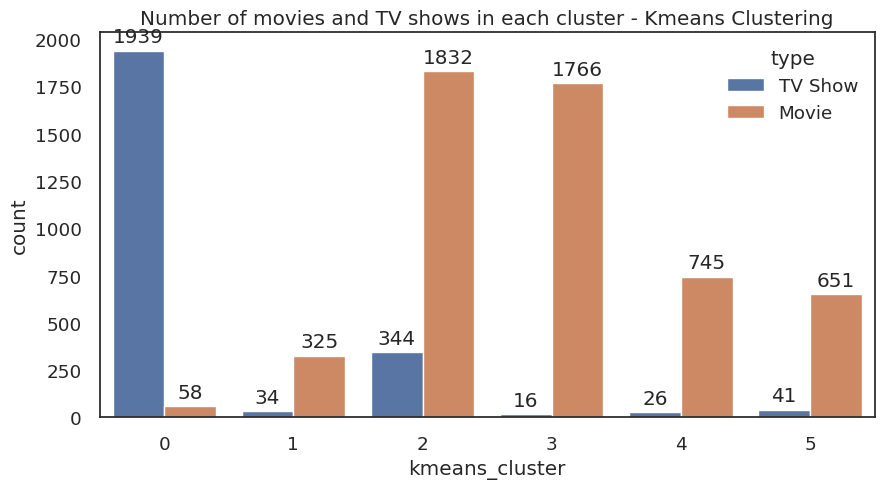

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=dataset, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

K-means clustering is a popular unsupervised machine learning algorithm used for clustering and data exploration. It partitions the dataset into k number of clusters based on their similarity. The goal of the algorithm is to minimize the distance between the data points and their assigned cluster centers.

How It's Work?

* The k-means algorithm works by first selecting k initial "centroids," or cluster centers, at random from the data.

* Then, it assigns each sample in the dataset to the nearest centroid, based on some distance metric like Euclidean distance.

* The algorithm then updates the centroids to be the mean of the samples in each cluster.

* Teratively repeats the process of reassigning samples to the nearest centroids and updating the centroids until convergence.

Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.

### ML Model - 2 - Hierarchical Clustering

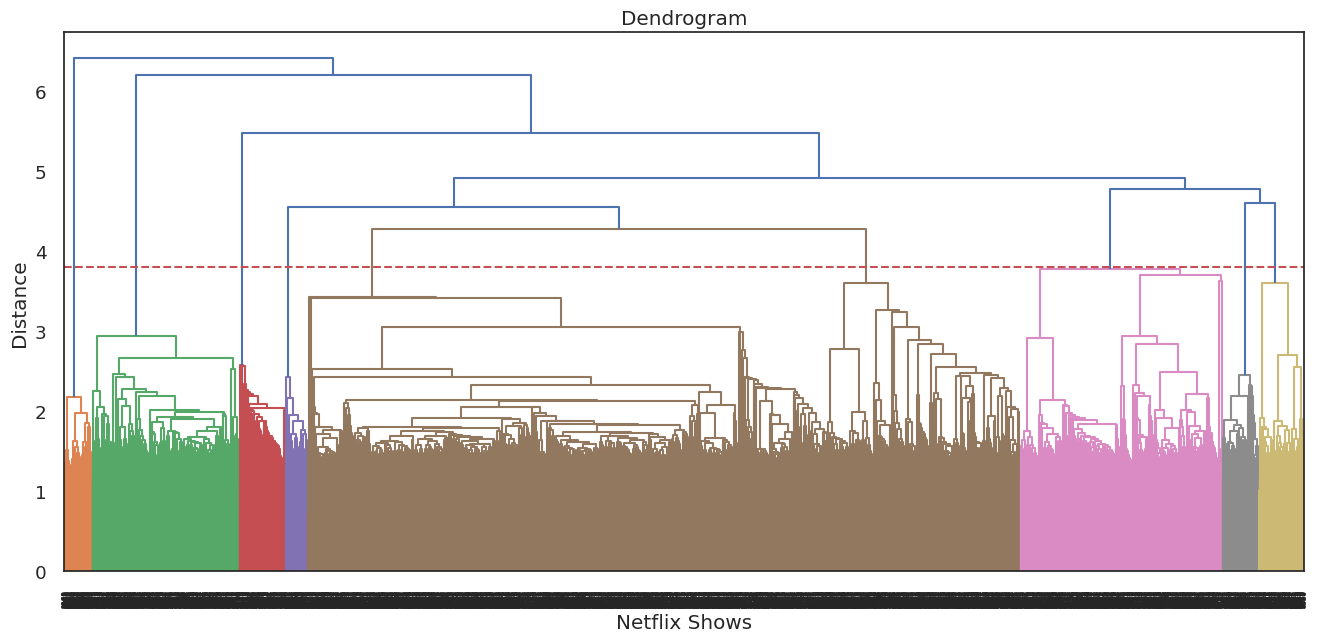

In [ ]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(16, 7)) 
import scipy.cluster.hierarchy as shc

dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(x_pca)

array([ 0,  0,  1, ...,  4,  4, 10])

In [ ]:
# Adding a kmeans cluster number attribute
dataset['hierarchical_cluster'] = hierarchical.labels_

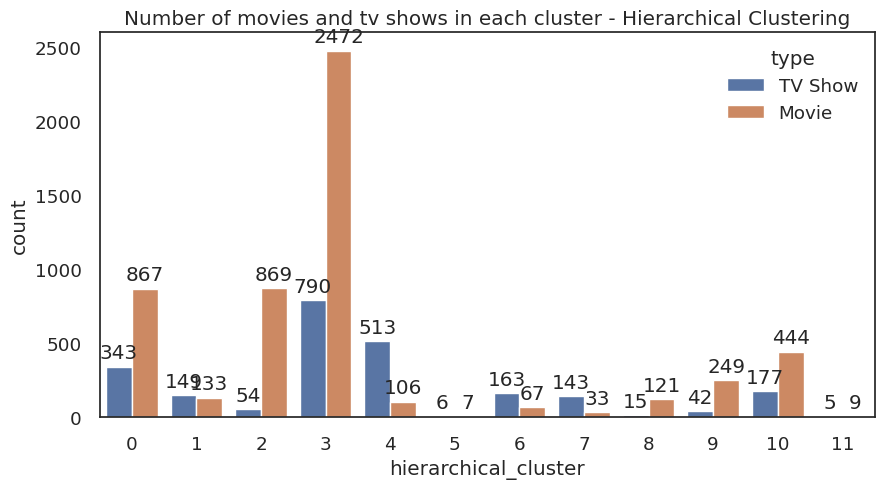

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=dataset, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in dataset[dataset['hierarchical_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
  return hierarchical_worldcloud

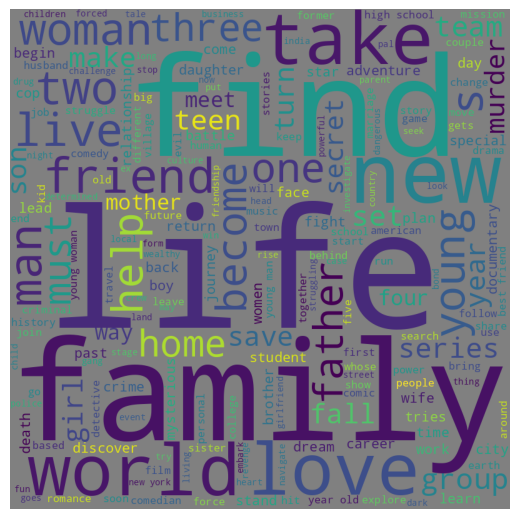

In [ ]:
# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

Building clusters using the Agglomerative (hierarchical) clustering algorithm.

Agglomerative hierarchical clustering is a method of clustering that is used to build a hierarchy of clusters. It is a bottom-up approach, where each sample is initially treated as a single-sample cluster and clusters are merged together as they are deemed similar.

How it's work?

* The algorithm starts by calculating the distance between all pairs of samples and storing them in a distance matrix.

* Then selects the two closest clusters and merges them into a single cluster.

* Above process is repeated until all the samples are in the same cluster.

The resulting clusters form a tree-like structure called a dendrogram, which shows the relationships between the clusters at each level of the hierarchy.

Visualizing the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm.

### ML Model - 3 - Content Based Recommendation System

In [ ]:
# defining a new df for building a recommender system
recommender_df = dataset.copy()

In [ ]:
# Changing the index of the df from show id to show title
recommender_df['show_id'] = recommender_df.index

In [ ]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

recommender_df['organized'] = recommender_df['organized'].apply(lambda x: convert(x))

In [ ]:
# setting title of movies/Tv shows as index
recommender_df.set_index('title',inplace=True)

In [ ]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(recommender_df["organized"])

In [ ]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [ ]:
# cosine_similarity rows and columns
cosine_similarity.shape

(7777, 7777)

In [ ]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(recommender_df.index)

def recommend_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []   
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(recommender_df.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [ ]:
# Recommendations for 'A Man Called God'
recommend_10('A Man Called God')

If you liked 'A Man Called God', you may also enjoy:



['One Spring Night',
 'Mr. Sunshine',
 'Rugal',
 'The King: Eternal Monarch',
 'My Mister',
 'Illang: The Wolf Brigade',
 'Extracurricular',
 'The Lies Within',
 'Reply 1994',
 'Private Lives']

In [ ]:
# Recommendations for 'Lucifer'
recommend_10('Lucifer')

If you liked 'Lucifer', you may also enjoy:



['Rica, Famosa, Latina',
 'Exhibit A',
 'Trial By Media',
 'Women Behind Bars',
 'Inside the Criminal Mind',
 'Cold Case Files',
 'The Confession Tapes',
 'Trial 4',
 'Terrorism Close Calls',
 'Making a Murderer']

In [ ]:
# Recommendations for 'Stranger Things'
recommend_10('Stranger Things')

If you liked 'Stranger Things', you may also enjoy:



['Beyond Stranger Things',
 'Tread',
 'Prank Encounters',
 'Zombie Dumb',
 'Kiss Me First',
 'Henry Danger',
 'Drug Lords',
 'Haunted',
 'Living Undocumented',
 'Million Dollar Beach House']

In [ ]:
# Recommendations for 'Peaky Blinders'
recommend_10('Peaky Blinders')

If you liked 'Peaky Blinders', you may also enjoy:



['Rebellion',
 'The Blue Planet: A Natural History of the Oceans',
 'Mega Food',
 'I AM A KILLER: RELEASED',
 'Botched Up Bodies',
 'The Hunt',
 'The Murder Detectives',
 'Inside The Freemasons',
 'Happy Valley',
 'Greatest Events of WWII in Colour']

Content-based recommendation systems suggest items to users based on their past preferences and interests. In this type of recommendation system, items are described based on a set of features or attributes. The system then recommends items to users that are similar to the ones they have already liked.

In the context of a movie or TV show recommendation system, the features or attributes could be the genre, cast, director, plot keywords, and other metadata associated with each title.

The content-based recommendation system typically follows the following steps:

1. Feature extraction: Extract the relevant features from the data for each movie or TV show, such as the genre, cast, and plot keywords.

2 .Feature representation: Convert the features into a vector representation that can be used to calculate similarity between titles.

3. Similarity calculation: Calculate the similarity between the vectors of each movie or TV show.

4. Recommendation generation: Recommend titles that are most similar to the ones that the user has already liked.

##  **Observation**



1. The dataset contains a wide range of TV shows and movies from different countries, including a variety of genres. 


2. The top 10 countries with the most content are the United States, India, the United Kingdom, Japan, South Korea, Canada, France, Spain, Mexico, and Australia.

3. Netflix seems to be focusing more on TV shows than movies.

4. The most common genres in the dataset are Dramas, Comedies, Documentaries, and Action & Adventure.

5. The Content-Based Recommendation System recommends similar movies and TV shows based on their plot summaries, which can be useful for users looking for specific genres or themes.

6. The K-means clustering and Hierarchical clustring algorithm groups the movies and TV shows based on their similarity in terms of genre, rating, and country of origin.


7. Overall, the project shows how data analysis and machine learning algorithms can be applied to make recommendations and gain insights from a large dataset such as Netflix's.

# **Conclusion**

### After performing exploratory data analysis on the Netflix dataset, we can conclude that:

* Netflix's content has increased over the years, with a significant increase in the number of TV shows since 2008.
* The majority of the content on Netflix is movies, followed by TV shows and documentaries.
* The United States is the country with the most content on Netflix, followed by India and the United Kingdom.
* The most common genre on Netflix is drama, followed by comedy, Documentaries and Action & Adventure.
* Netflix has a diverse range of content from different countries, with a significant portion of content being produced in the United States.

* Most TV shows on Netflix have one season, with a few having two, three or more seasons.

### FROM MODEL IMPLEMENTATION:
* The data was clustered based on the attributes: director, cast, country, genre, rating, and description.

* TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes, creating a total of 20000 attributes.

* The k-means clustering algorithm was implemented to group similar movies and TV shows together based on the extracted features. It was found that a value of 6 was optimal for the number of clusters.

* The content-based recommendation system was built using cosine similarity on the Netflix dataset. The dataset was preprocessed, cleaned and transformed into a structured format. A bag-of-words approach was used to create a term frequency-inverse document frequency (TF-IDF) matrix, which was then used to compute cosine similarities between pairs of movies and TV shows.

* Finally, the content-based recommendation system based on cosine similarity was able to recommend 10 similar movies/TV shows based on a selected title. This system could be used to suggest movies or TV shows to Netflix users based on their preferences.

* I hope that these recommendation systems can be used to help users find TV shows and movies that match their interests. By providing recommendations that are tailored to the user's preferences, we can enhance their overall experience of using Netflix.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***